In [1]:
#implementing neural network from scratch

In [2]:
import pandas as pd
import numpy as np

In [3]:
def sigmoid(z):
    return 1.0/(1+ np.exp(-z))
def sigmoid_derivative(z):
    return sigmoid(z) * (1.0-sigmoid(z))

In [4]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1=np.random.randn(n_input, n_hidden)
    b1=np.zeros((1, n_hidden))
    W2=np.random.randn(n_hidden, 1)
    b2=np.zeros((1,1))
    for i in range(1, n_iter+1):
        Z2=np.matmul(X,W1) + b1
        A2=sigmoid(Z2)
        Z3=np.matmul(A2, W2) + b2
        A3=Z3
        dZ3=A3-y
        dW2=np.matmul(A2.T, dZ3)
        db2=np.sum(dZ3, axis=0, keepdims=True)
        dZ2=np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1=np.matmul(X.T, dZ2)
        db1=np.sum(dZ2, axis=0)
        W2=W2-learning_rate*dW2/m
        b2=b2-learning_rate*db2/m
        W1=W1-learning_rate*dW1/m
        
        b1=b1-learning_rate*db1/m
        if i % 100==0:
            cost=np.mean((y-A3)**2)
            print('Iteration %i, training loss: %f' % (i,cost))
    model={'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return model

In [5]:
#Using Boston data to test the model

In [6]:
from sklearn import datasets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

/Users/vimalrajmatmari/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
#boston=datasets.load_boston()
num_test=10 #the last 10 samples as testing set
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X_train=data[:-num_test, :]
X_train=scaler.fit_transform(X_train)
y_train=target[:-num_test].reshape(-1,1)
X_test=data[-num_test:, :]
X_test=scaler.transform(X_test)
y_test=target[-num_test:]

In [8]:
n_hidden=20
learning_rate=0.1
n_iter=2000
model=train(X_train,y_train,n_hidden,learning_rate,n_iter)

Iteration 100, training loss: 13.028557
Iteration 200, training loss: 9.046222
Iteration 300, training loss: 7.360868
Iteration 400, training loss: 6.418070
Iteration 500, training loss: 5.819625
Iteration 600, training loss: 5.378253
Iteration 700, training loss: 4.992037
Iteration 800, training loss: 4.653372
Iteration 900, training loss: 4.388898
Iteration 1000, training loss: 4.171886
Iteration 1100, training loss: 3.980584
Iteration 1200, training loss: 3.806860
Iteration 1300, training loss: 3.649822
Iteration 1400, training loss: 3.507116
Iteration 1500, training loss: 3.375375
Iteration 1600, training loss: 3.253883
Iteration 1700, training loss: 3.143197
Iteration 1800, training loss: 3.041324
Iteration 1900, training loss: 2.948273
Iteration 2000, training loss: 2.865341


In [9]:
def predict(x, model):
    W1=model['W1']
    b1=model['b1']
    W2=model['W2']
    b2=model['b2']
    A2=sigmoid(np.matmul(x,W1)+b1)
    A3=np.matmul(A2, W2)+b2
    return A3

In [10]:
predictions=predict(X_test, model)

In [11]:
print(predictions)

[[19.56704676]
 [19.3796713 ]
 [21.30793505]
 [20.26612855]
 [19.38243945]
 [29.07565355]
 [26.50946734]
 [30.74275685]
 [28.56865957]
 [25.11370734]]


In [12]:
print(y_test)

[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


In [13]:
#Implementating scikit-learn 

In [14]:
from sklearn.neural_network import MLPRegressor
nn_scikit=MLPRegressor(hidden_layer_sizes=(16,8), activation='relu', solver='adam', 
                       learning_rate_init=0.001, random_state=42, max_iter=2000)

In [15]:
nn_scikit.fit(X_train, y_train)
predictions_1=nn_scikit.predict(X_test)
print(predictions_1)

/Users/vimalrajmatmari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16.79582331 18.55538023 21.07961496 19.21362606 18.50955771 23.5608387
 22.27916529 27.11909153 24.70251262 22.05522035]


/Users/vimalrajmatmari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print(np.mean((y_test-predictions_1)**2))

13.933482332708786


In [17]:
#Implementing neural networks with TensorFlow

In [23]:
pip install tensorflow

     |████████████████████████████████| 229.6 MB 31.4 MB/s eta 0:00:01    |███████████▋                    | 83.0 MB 51.6 MB/s eta 0:00:03     |█████████████████▌              | 125.3 MB 31.8 MB/s eta 0:00:04     |█████████████████████████▎      | 181.0 MB 1.0 MB/s eta 0:00:47
     |████████████████████████████████| 24.5 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 130 kB 38.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 25.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 409 kB 47.1 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 34.8 MB/s eta 0:00:01
     |██████████████████████████

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.0 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.23.2 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.2 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

2023-10-01 11:51:31.878049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model=keras.Sequential([keras.layers.Dense(units=20, activation='relu'), keras.layers.Dense(units=8, activation='relu'),keras.layers.Dense(units=1)])

In [20]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.02))

In [21]:
model.fit(X_train,y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 413.3131
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 92.6940
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 33.4044
Epoch 4/300
16/16 [==============================] - 0s 2ms/step - loss: 23.7314
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 18.8016
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 16.7342
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 14.2046
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 14.3343
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 12.6288
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 11.4486
Epoch 11/300
16/16 [==============================] - 0s 1ms/step - loss: 11.3208
Epoch 12/300
16/16 [==============================] - 0s 1ms/step - loss: 10.8952
Epoch 13/300
16/16 [====

16/16 [==============================] - 0s 1ms/step - loss: 5.7388
Epoch 103/300
16/16 [==============================] - 0s 1ms/step - loss: 5.9530
Epoch 104/300
16/16 [==============================] - 0s 1ms/step - loss: 6.3018
Epoch 105/300
16/16 [==============================] - 0s 1ms/step - loss: 6.4107
Epoch 106/300
16/16 [==============================] - 0s 1ms/step - loss: 6.3143
Epoch 107/300
16/16 [==============================] - 0s 1ms/step - loss: 5.7392
Epoch 108/300
16/16 [==============================] - 0s 1ms/step - loss: 5.4197
Epoch 109/300
16/16 [==============================] - 0s 1ms/step - loss: 5.3575
Epoch 110/300
16/16 [==============================] - 0s 1ms/step - loss: 5.5402
Epoch 111/300
16/16 [==============================] - 0s 1ms/step - loss: 5.9293
Epoch 112/300
16/16 [==============================] - 0s 1ms/step - loss: 5.3809
Epoch 113/300
16/16 [==============================] - 0s 1ms/step - loss: 5.3624
Epoch 114/300
16/16 [=========

16/16 [==============================] - 0s 1ms/step - loss: 4.0181
Epoch 203/300
16/16 [==============================] - 0s 1ms/step - loss: 4.0990
Epoch 204/300
16/16 [==============================] - 0s 1ms/step - loss: 4.3387
Epoch 205/300
16/16 [==============================] - 0s 1ms/step - loss: 4.3564
Epoch 206/300
16/16 [==============================] - 0s 1ms/step - loss: 4.0085
Epoch 207/300
16/16 [==============================] - 0s 1ms/step - loss: 3.7105
Epoch 208/300
16/16 [==============================] - 0s 1ms/step - loss: 3.5776
Epoch 209/300
16/16 [==============================] - 0s 1ms/step - loss: 3.8800
Epoch 210/300
16/16 [==============================] - 0s 1ms/step - loss: 3.7313
Epoch 211/300
16/16 [==============================] - 0s 1ms/step - loss: 3.5732
Epoch 212/300
16/16 [==============================] - 0s 1ms/step - loss: 3.5796
Epoch 213/300
16/16 [==============================] - 0s 1ms/step - loss: 4.0996
Epoch 214/300
16/16 [=========

In [22]:
predictions_2=model.predict(X_test)[:,0]
print(predictions_2)

1/1 [==============================] - 0s 65ms/step
[20.322912 20.182194 22.984016 20.029615 20.895344 24.403944 21.615715
 24.739471 23.47913  20.743153]


In [23]:
print(np.mean((y_test-predictions_2)**2))

11.642553640569602


In [24]:
#preventing overfitting in neural networks
model=keras.Sequential([keras.layers.Dense(units=32, activation='relu'), tf.keras.layers.Dropout(0.5),keras.layers.Dense(units=1)])

In [25]:
#predicting stock prices with neural networks

In [26]:
mydata=pd.read_csv(r"/Users/vimalrajmatmari/Documents/Machine learning/Dow Jones Industrial Average Prices/20051201_20051210.csv",index_col='Date')
mydata

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [27]:
#implement feature generation by starting with a sub-function that directly creates features from the original six features
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)

In [28]:
#develop a sub-function that generates six features related to average close prices
def add_avg_price(df, df_new):
    df_new['avg_price_5']=df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30']=df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365']=df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30']=df_new['avg_price_5']/df_new['avg_price_30']
    df_new['ratio_avg_price_5_365']=df_new['avg_price_5']/df_new['avg_price_365']
    df_new['ratio_avg_price_30_365']=df_new['avg_price_30']/df_new['avg_price_365']

In [29]:
#a sub-function that generates six features related to average volumes is as follows
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] =df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] =df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5']/df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365']=df_new['avg_volume_5']/df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30']/df_new['avg_volume_365']

In [30]:
#for the standard deviation, we develop the following sub-function for the price related features
def add_std_price(df, df_new):
    df_new['std_price_5'] =df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] =df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] =df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5']/df_new['std_price_30']
    df_new['ratio_std_price_5_365']=df_new['std_price_5']/df_new['std_price_365']
    df_new['ratio_std_price_30_365']=df_new['std_price_30']/df_new['std_price_365']

In [31]:
#Similarly, a sub-function that generates six volume-based standard deviation features is as follows.
def add_std_volume(df, df_new):
    df_new['std_volume_5']=df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30']=df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] =df['Volume'].rolling(252).std().shift (1)
    df_new['ratio_std_volume_5_30']=df_new['std_volume_5']/df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] =df_new['std_volume_5']/df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =df_new['std_volume_30']/df_new['std_volume_365']

In [32]:
#Seven return-based features are generated using the following sub-function.
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] -df['Close'].shift(21))/df['Close'].shift (21)).shift(1)
    df_new['return_365'] = ((df['Close'] -df['Close'].shift(252))/df['Close'].shift (252)).shift(1)
    df_new['moving_avg_5'] =df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] =df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] =df_new['return_1'].rolling(252).mean().shift(1)

In [33]:
#Finally, we put together the main feature generation function that calls all the preceding sub-functions.
def generate_features(df):
    
    df_new=pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df,df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df,df_new)
    add_return_feature(df,df_new)
    #the target
    df_new['close']=df['Close']
    df_new=df_new.dropna(axis=0)
    return df_new

In [34]:
data_raw=pd.read_csv(r"/Users/vimalrajmatmari/Documents/Machine learning/Dow Jones Industrial Average Prices/19880101_20191231.csv", index_col='Date')
data=generate_features(data_raw)

In [35]:
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

In [36]:
#We load the stock data, generate features, and label the generate_features function, Predicting Stock Prices with Regression Algorithms:
data_raw=pd.read_csv(r"/Users/vimalrajmatmari/Documents/Machine learning/Dow Jones Industrial Average Prices/19880101_20191231.csv", index_col='Date')
data=generate_features(data_raw)

In [37]:
#We construct the training set using data from 1988 to 2018 and the testing set using data from 2019:
start_train='1988-01-01'
end_train='2018-12-31'
start_test='2019-01-01'
end_test='2019-12-31'
data_train=data.loc[start_train:end_train]
X_train=data_train.drop('close', axis=1).values
y_train=data_train['close'].values
data_test=data.loc[start_test:end_test]
X_test=data_test.drop('close',axis=1).values
y_test=data_test['close'].values

In [38]:
#We need to normalize features into the same or a comparable scale. We do so by removing the mean and rescaling to unit variance:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
#We rescale both sets with the scaler taught by the training set:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [40]:
#We now build a neural network model using the Keras Sequential API:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([Dense(units=32, activation='relu'), Dense(units=1)])

In [41]:
#And we compile the model by using Adam as the optimizer with a learning rate of 0.1 and MSE as the learning goal:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [42]:
#After defining the model, we now train it against the training set:
model.fit(X_scaled_train, y_train, epochs=100, verbose=True)

Epoch 1/100
237/237 [==============================] - 1s 1ms/step - loss: 33826648.0000
Epoch 2/100
237/237 [==============================] - 0s 1ms/step - loss: 2016950.7500
Epoch 3/100
237/237 [==============================] - 0s 1ms/step - loss: 490370.3438
Epoch 4/100
237/237 [==============================] - 0s 1ms/step - loss: 157370.5000
Epoch 5/100
237/237 [==============================] - 0s 1ms/step - loss: 69509.6953
Epoch 6/100
237/237 [==============================] - 0s 1ms/step - loss: 41305.3164
Epoch 7/100
237/237 [==============================] - 0s 944us/step - loss: 29538.2754
Epoch 8/100
237/237 [==============================] - 0s 913us/step - loss: 25205.7578
Epoch 9/100
237/237 [==============================] - 0s 911us/step - loss: 25825.3828
Epoch 10/100
237/237 [==============================] - 0s 940us/step - loss: 23978.1289
Epoch 11/100
237/237 [==============================] - 0s 908us/step - loss: 28834.5703
Epoch 12/100
237/237 [=============

237/237 [==============================] - 0s 1ms/step - loss: 19769.0078
Epoch 94/100
237/237 [==============================] - 0s 1ms/step - loss: 24970.9121
Epoch 95/100
237/237 [==============================] - 0s 1ms/step - loss: 21735.2656
Epoch 96/100
237/237 [==============================] - 0s 1ms/step - loss: 19469.3066
Epoch 97/100
237/237 [==============================] - 0s 1ms/step - loss: 21534.7852
Epoch 98/100
237/237 [==============================] - 0s 898us/step - loss: 20238.2344
Epoch 99/100
237/237 [==============================] - 0s 906us/step - loss: 19667.6348
Epoch 100/100
237/237 [==============================] - 0s 886us/step - loss: 21117.0586


In [43]:
predictions_3=model.predict(X_scaled_test)
print(predictions_3)

8/8 [==============================] - 0s 2ms/step
[[23580.11 ]
 [23591.193]
 [23085.87 ]
 [23756.422]
 [23859.4  ]
 [24095.861]
 [24133.498]
 [24262.42 ]
 [24252.807]
 [24212.822]
 [24391.607]
 [24505.63 ]
 [24717.596]
 [24966.629]
 [24746.357]
 [24910.332]
 [24896.068]
 [25016.04 ]
 [24784.236]
 [24969.176]
 [25307.9  ]
 [25207.918]
 [25351.318]
 [25538.916]
 [25701.38 ]
 [25626.684]
 [25452.447]
 [25438.344]
 [25461.627]
 [25800.527]
 [25890.736]
 [25812.615]
 [26214.203]
 [26248.436]
 [26298.16 ]
 [26226.541]
 [26436.693]
 [26492.623]
 [26426.842]
 [26357.701]
 [26308.926]
 [26432.906]
 [26199.822]
 [26191.674]
 [26069.861]
 [25827.74 ]
 [25725.643]
 [25924.084]
 [25937.135]
 [26049.479]
 [26067.467]
 [26014.277]
 [26172.182]
 [26172.285]
 [25993.236]
 [26152.922]
 [25883.666]
 [25947.166]
 [26078.16 ]
 [26042.926]
 [26089.725]
 [26367.256]
 [26675.354]
 [26609.451]
 [26644.74 ]
 [26788.781]
 [26796.51 ]
 [26684.35 ]
 [26572.15 ]
 [26615.945]
 [26644.627]
 [26772.818]
 [26769.375]


In [44]:
#Finally, we use the trained model to predict the testing data and display metrics:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'MSE: {mean_squared_error(y_test,predictions_3):.3f}')

MSE: 172599.629


In [45]:
print(f'MAE: {mean_absolute_error(y_test,predictions_3):.3f}')

MAE: 371.248


In [46]:
print(f'R^2: {r2_score(y_test, predictions_3):.3f}')

R^2: 0.851


In [47]:
#Fine-tuning the neural network

In [48]:
from tensorboard.plugins.hparams import api as hp

In [49]:
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32,16])) 
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000])) 
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.RealInterval (0.01, 0.4))

In [50]:
def train_test_model(hparams, logdir):

    model = Sequential([Dense(units=hparams[HP_HIDDEN], activation='relu'),Dense(units=1)])

    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),metrics=['mean_squared_error'])

    model.fit(X_scaled_train, y_train,validation_data=(X_scaled_test, y_test), epochs=hparams [HP_EPOCHS], verbose=False, callbacks=[tf.keras.callbacks. TensorBoard (logdir), hp.KerasCallback(logdir, hparams), tf.keras.callbacks. EarlyStopping( monitor= 'val_loss', min_delta=0, patience=200, verbose=0, mode= 'auto',)],)
    mse=model.evaluate(X_scaled_test, y_test)[1]


    pred = model.predict(X_scaled_test)

    r2 = r2_score (y_test, pred)

    return mse, r2 

In [51]:
def run (hparams, logdir):

    with tf.summary.create_file_writer (logdir).as_default(): 
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE],
                          metrics=[hp.Metric('mean_squared_error', display_name='mse'),
                                   hp.Metric('r2', display_name='r2')])
        mse, r2 = train_test_model(hparams, logdir)
        tf.summary.scalar('mean_squared_error', mse, step=1)
        tf.summary.scalar('r2', r2, step=1)

In [52]:
session_num=1
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5): 
                hparams ={HP_HIDDEN: hidden,HP_EPOCHS: epochs,HP_LEARNING_RATE:float("%.2f"%float (learning_rate)),}

                run_name = "run-%d" % session_num 
                print('-- Starting trial: %s' % run_name) 
                print({h.name: hparams[h] for h in hparams}) 
                run(hparams, 'logs/hparam_tuning/' + run_name) 
                session_num+=1

-- Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-5
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-7
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 1ms/step
-- Starting trial: run-8
{'hidden_size': 16, 'epochs': 1000, '

In [61]:
%load_ext tensorboard
%tensorboard --logdir /content/logs/hparam_tuning

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13570), started 0:08:49 ago. (Use '!kill 13570' to kill it.)

In [63]:
ls /content/logs/hparam_tuning

ls: /content/logs/hparam_tuning: No such file or directory


In [57]:
#we use the optimal model to make predictions:
model=Sequential([Dense(units=16, activation='relu'), Dense(units=1)])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions_4= model.predict(X_scaled_test)[:,0]

8/8 [==============================] - 0s 1ms/step


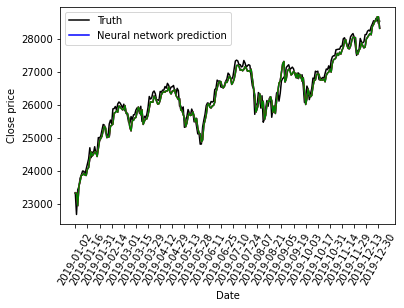

In [58]:
#Plot the prediction along with the ground truth as follows:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index,predictions_4,c='b')
plt.plot(data_test.index,predictions_4,c='r')
plt.plot(data_test.index,predictions_4,c='g')
plt.xticks(range(0,252,10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])
plt.show()